## Modelagem e simulação cinemática de um governador centrifugo (Flyball governor)

In [218]:
import sympy as sy
import sympy.physics.mechanics as me

Considerando o desenho tecnico a seguir, podemos definir as dimensões e angulos associados ao movimento dos elementos do governador:

![alt text](Governor.jpg)


Definindo os simbolos

In [180]:
theta = me.dynamicsymbols('theta') #rotação de A->B
gamma = me.dynamicsymbols('gamma') #rotação de N->A
omegaNA = me.dynamicsymbols('omega') #velocidade angular A->b
phiAB = me.dynamicsymbols('phi') #velocidade angular N->A
alphaNA = me.dynamicsymbols('alpha') #aceleração angular A->b
psiAB = me.dynamicsymbols('psi') #aceleração angular N->A

H = sy.symbols('H')
rE = sy.symbols('rE') #Representado por r no desenho
#rJ = sy.symbols('rJ')
l = sy.symbols('l')
d = sy.symbols('d')
h = me.dynamicsymbols('h')
#t = me.dynamicsymbols._t

Criando os referenciais

In [181]:
N = me.ReferenceFrame('N')
A = me.ReferenceFrame('A')
B = me.ReferenceFrame('B')
#C = me.ReferenceFrame('C')

Orientando os referenciais

In [182]:
A.orient(N, 'Axis', [gamma, N.z])
B.orient(A, 'Axis', [-theta, A.y])
#C.orient(B, 'Axis', [, B.y])

Criando os pontos e vetores de posição

In [183]:
O = me.Point('O')
O.set_vel(N, 0)

In [184]:
E = me.Point('E')
#Q = me.Point('Q')

pD1O = H*A.z
pD2D1 = d*A.x
pED2 = -rE*B.z

#pJD2 = -rJ*B.z
#pQJ = -l*C.x

pEO = pD1O + pD2D1 + pED2 #posição do centro da esfera em relação ao ponto O
#pQO = pD1O + pD2D1 + pJD2 + pQJ

E.set_pos(O, pEO)
#Q.set_pos(O, pQJ)

Definindo a posição da esfera E em relação ao ponto O no referencial inercial

In [185]:
E.pos_from(O)

d*A.x + H*A.z - rE*B.z

Posição do cursor

In [186]:
#Q.pos_from(O)

Posição da esfera E em relação a O expressada em N

In [187]:
pE = E.pos_from(O).express(N)
pE

(d*cos(gamma(t)) + rE*sin(theta(t))*cos(gamma(t)))*N.x + (d*sin(gamma(t)) + rE*sin(gamma(t))*sin(theta(t)))*N.y + (H - rE*cos(theta(t)))*N.z

### Simulando posição da esfera em diferentes vistas e casos:

Dimensões dos elementos do mecanismo

In [188]:
dic = {H:5, l:2, rE:3, d:1}
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [189]:
thetan = np.linspace(0, np.pi/2, 720)
gamman = np.linspace(0, 2*np.pi, 720)
pE_num_XZx = np.zeros(720)
pE_num_XZz = np.zeros(720)

pE_num_XYx = np.zeros(720)
pE_num_XYy = np.zeros(720)

Gerando o vetor posição manipulavel com as dimensões dos elementos pE_num

In [190]:
pE_num = pE.subs(dic)
pE_num

(3*sin(theta(t))*cos(gamma(t)) + cos(gamma(t)))*N.x + (3*sin(gamma(t))*sin(theta(t)) + sin(gamma(t)))*N.y + (5 - 3*cos(theta(t)))*N.z

Fixando o angulo $\gamma$ do em 0° e movimentando a esfera atravez do eixo $\theta$ podemos observar e confirmar que sua trajetoria em relação ao corpo do governador:

In [191]:
pE_num = pE_num.subs(gamma, 0)
pE_num

(3*sin(theta(t)) + 1)*N.x + (5 - 3*cos(theta(t)))*N.z

In [192]:
for i in range(0, 720):
    pE_num_XZx[i] = pE_num.subs(theta, thetan[i]).args[0][0][0]
    
for i in range(0, 720):
    pE_num_XZz[i] = pE_num.subs(theta, thetan[i]).args[0][0][2]

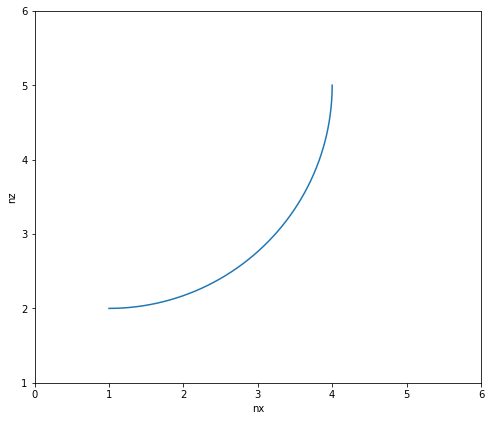

In [193]:
fig = plt.figure(figsize=[8,8])
ax = fig.add_subplot()
ax.set_aspect('equal', adjustable='box')
plt.xlim(0, 6)
plt.ylim(1, 6)
plt.xlabel("nx")
plt.ylabel("nz")

Exz_plt = plt.plot(pE_num_XZx, pE_num_XZz)

Plotando na vista superior a trajetoria da esfera com $\theta$ fixo em 45°,podemos observar a trajetoria circular da esfera no caso de uma velocidade angular constante em que $\theta$ ficaria estavel dependendo das dimensões do corpo:

In [194]:
pE_num = pE.subs(dic)
pE_num = pE_num.subs(theta, np.pi/4)
pE_num

3.12132034355964*cos(gamma(t))*N.x + 3.12132034355964*sin(gamma(t))*N.y + 2.87867965644036*N.z

In [195]:
for i in range(0, 720):
    pE_num_XYx[i] = pE_num.subs(gamma, gamman[i]).args[0][0][0]
    
for i in range(0, 720):
    pE_num_XYy[i] = pE_num.subs(gamma, gamman[i]).args[0][0][1]

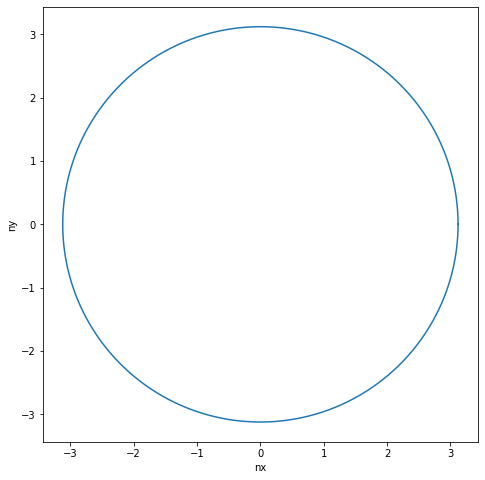

In [196]:
fig = plt.figure(figsize=[8,8])
ax = fig.add_subplot()
ax.set_aspect('equal', adjustable='box')
plt.xlabel("nx")
plt.ylabel("ny")
Exy_plt = plt.plot(pE_num_XYx, pE_num_XYy)

Observando esta trajetoria em pespectiva:

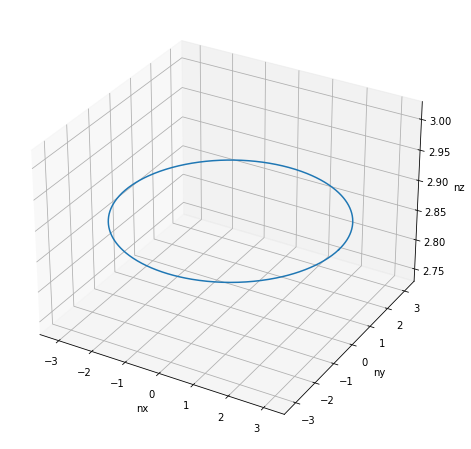

In [197]:
pE_num_XYz = pE_num.args[0][0][2]
fig = plt.figure(figsize=[8,8])
ax = fig.add_subplot(111, projection='3d')
plt.xlabel("nx")
plt.ylabel("ny")
ax.set_zlabel("nz")
plt.plot(pE_num_XYx, pE_num_XYy, pE_num_XYz)

Plotando o dominio da posição da esfera:

In [198]:
thetan = np.linspace(0, np.pi/2, 45)
gamman = np.linspace(0, 2*np.pi, 360)

pE_num_XYZx = np.zeros(16200)
pE_num_XYZy = np.zeros(16200)
pE_num_XYZz = np.zeros(16200)

In [199]:
pE_num_XYZn = pE.subs(dic)
pE_num_XYZn

(3*sin(theta(t))*cos(gamma(t)) + cos(gamma(t)))*N.x + (3*sin(gamma(t))*sin(theta(t)) + sin(gamma(t)))*N.y + (5 - 3*cos(theta(t)))*N.z

In [200]:
for i in range(45):  
    pE_num_XYZn = pE.subs(dic)
    pE_num_XYZn = pE_num_XYZn.subs(theta, thetan[i])
    for j in range(360):
        pE_num_XYZz[(i*360)+j] = pE_num_XYZn.subs(gamma, gamman[j]).args[0][0][2]
        pE_num_XYZx[(i*360)+j] = pE_num_XYZn.subs(gamma, gamman[j]).args[0][0][0]
        pE_num_XYZy[(i*360)+j] = pE_num_XYZn.subs(gamma, gamman[j]).args[0][0][1]
            

Neste grafico podemos ver uma casca semi-esferica que descreve todas as posições possiveis do centro da esfera:

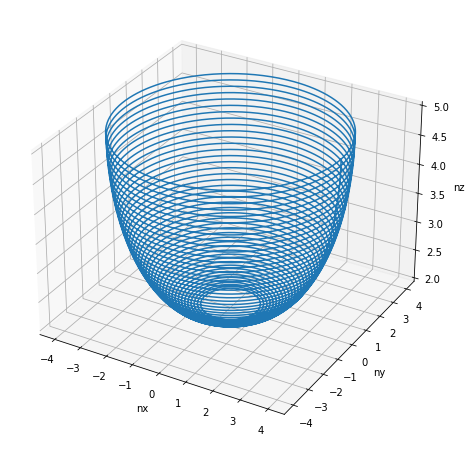

In [201]:
fig = plt.figure(figsize=[8,8])
ax = fig.add_subplot(111, projection='3d')
plt.xlabel("nx")
plt.ylabel("ny")
ax.set_zlabel("nz")
plt.plot(pE_num_XYZx, pE_num_XYZy, pE_num_XYZz)

Considerando o governador em repouso, ao iniciar uma rotação no mesmo, pode-se notar a elevação das esferas até um ponto de equilibrio, onde força centripeta resultante da força que a haste exerce na esfera para segura=la e a gravidade se iguala a força centrifuga gerada pela rotação do governador.
Podemos ver a tragetoria de uma das esferas descrita a seguir:

In [202]:
x = np.linspace(0, 3600, 3600)
raX = np.zeros(3600)

for i in range(3600):
    raX[i] = ((70 - (1 / ( (i + 43) / (3000) ) ) ) * np.pi) / 180 #este array servirá para simular a elevação das esferas, uma vez que as equações de movimento só serão modeladas na segunda parte do curso. a expressão foi modelada com o geogebra para gerar uma assintota horizontal.
raX

array([0.00405891, 0.03173326, 0.05817764, ..., 1.20734589, 1.20734985,
       1.20735379])

In [203]:
thetan = raX
gamman = np.linspace(0, 20*np.pi, 3600)

pE_num_XYZx = np.zeros(3600)
pE_num_XYZy = np.zeros(3600)
pE_num_XYZz = np.zeros(3600)

In [204]:
pE_num_XYZn = pE.subs(dic)
pE_num_XYZn

(3*sin(theta(t))*cos(gamma(t)) + cos(gamma(t)))*N.x + (3*sin(gamma(t))*sin(theta(t)) + sin(gamma(t)))*N.y + (5 - 3*cos(theta(t)))*N.z

In [205]:
for i in range(3600):  
    pE_num_XYZn = pE.subs(dic)
    pE_num_XYZn = pE_num_XYZn.subs(theta, thetan[i])
    
    pE_num_XYZz[i] = pE_num_XYZn.subs(gamma, gamman[i]).args[0][0][2]
    pE_num_XYZx[i] = pE_num_XYZn.subs(gamma, gamman[i]).args[0][0][0]
    pE_num_XYZy[i] = pE_num_XYZn.subs(gamma, gamman[i]).args[0][0][1]

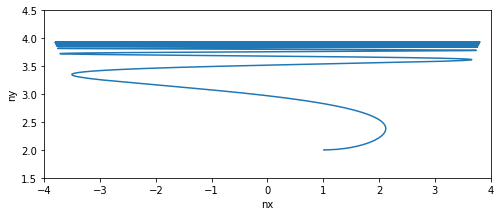

In [206]:
fig = plt.figure(figsize=[8,8])
ax = fig.add_subplot()
ax.set_aspect('equal', adjustable='box')
plt.xlabel("nx")
plt.ylabel("ny")
plt.xlim(-4, 4)
plt.ylim(1.5, 4.5)
Exy_plt = plt.plot(pE_num_XYZx, pE_num_XYZz)

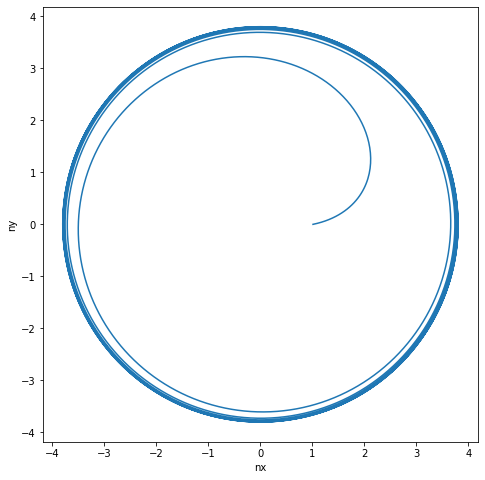

In [207]:
fig = plt.figure(figsize=[8,8])
ax = fig.add_subplot()
ax.set_aspect('equal', adjustable='box')
plt.xlabel("nx")
plt.ylabel("ny")
Exy_plt = plt.plot(pE_num_XYZx, pE_num_XYZy)

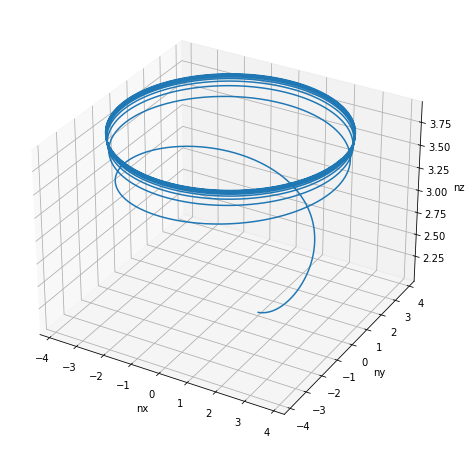

In [208]:
fig = plt.figure(figsize=[8,8])
ax = fig.add_subplot(111, projection='3d')
plt.xlabel("nx")
plt.ylabel("ny")
ax.set_zlabel("nz")
plt.plot(pE_num_XYZx, pE_num_XYZy, pE_num_XYZz)

### Obtendo a velocidade da esfera

In [209]:
E.set_vel(N, pEO.dt(N))

In [210]:
V = E.vel(N).express(N)
V = V.subs(sy.diff(theta), omegaNA)
V = V.subs(sy.diff(gamma), phiAB)
V

(-d*phi(t)*sin(gamma(t)) + rE*omega(t)*cos(gamma(t))*cos(theta(t)) - rE*phi(t)*sin(gamma(t))*sin(theta(t)))*N.x + (d*phi(t)*cos(gamma(t)) + rE*omega(t)*sin(gamma(t))*cos(theta(t)) + rE*phi(t)*sin(theta(t))*cos(gamma(t)))*N.y + rE*omega(t)*sin(theta(t))*N.z

Podemos obter a velocidade tangencial da esfera extraindo a expreção do eixo y no refenencial do corpo do governador (A)

In [211]:
Va = E.vel(N).express(A)
Va = Va.subs(sy.diff(theta), omegaNA)
Va = Va.subs(sy.diff(gamma), phiAB)
Va

rE*omega(t)*cos(theta(t))*A.x + (d*phi(t) + rE*phi(t)*sin(theta(t)))*A.y + rE*omega(t)*sin(theta(t))*A.z

In [212]:
Va = Va.subs(dic)
Va

3*omega(t)*cos(theta(t))*A.x + (3*phi(t)*sin(theta(t)) + phi(t))*A.y + 3*omega(t)*sin(theta(t))*A.z

In [213]:
VEtg = Va.args[0][0][1]
VEtg

3*phi(t)*sin(theta(t)) + phi(t)

A uma velocidade angular fixa de 2pi rad/s em $\gamma$, podemos observar a variação da velocidade tangencial da esfera dependendo de $\theta$:

In [214]:
VEtg = VEtg.subs(phiAB, 2*np.pi)
VEtg

18.8495559215388*sin(theta(t)) + 6.28318530717959

In [215]:
VEtg_n = np.zeros(90)
VEtheta = np.linspace(0, np.pi/4, 90)

for i in range(90):
    VEtg_n[i] = VEtg.subs(theta, VEtheta[i])

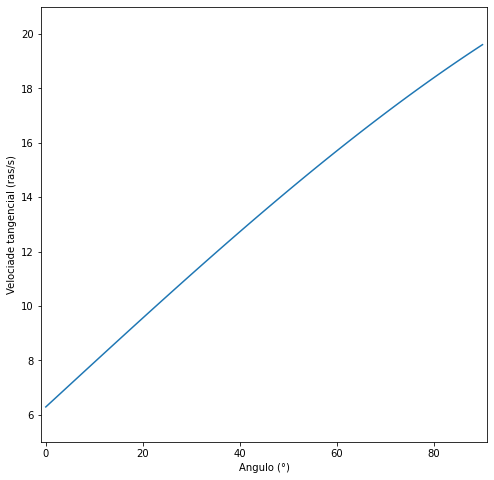

In [216]:
VE_plt_theta = np.linspace(0, 90, 90)
fig = plt.figure(figsize=[8,8])
ax = fig.add_subplot()
plt.xlim(-1, 91)
plt.ylim(5, 21)
plt.xlabel("Angulo (°)")
plt.ylabel("Velociade tangencial (ras/s)")

VEth_plt = plt.plot(VE_plt_theta, VEtg_n)

### Obtendo a aceleração da esfera:

In [217]:
a = E.acc(N).express(N)
a = a.subs(sy.diff(theta), omegaNA)
a = a.subs(sy.diff(gamma), phiAB)
a = a.subs(sy.diff(omegaNA), alphaNA)
a = a.subs(sy.diff(phiAB), psiAB)
a

(-d*phi(t)**2*cos(gamma(t)) - d*psi(t)*sin(gamma(t)) + (rE*alpha(t) - rE*phi(t)**2*sin(theta(t))*cos(theta(t)))*cos(gamma(t))*cos(theta(t)) - (rE*omega(t)**2 + rE*phi(t)**2*sin(theta(t))**2)*sin(theta(t))*cos(gamma(t)) - (2*rE*omega(t)*phi(t)*cos(theta(t)) + rE*psi(t)*sin(theta(t)))*sin(gamma(t)))*N.x + (-d*phi(t)**2*sin(gamma(t)) + d*psi(t)*cos(gamma(t)) + (rE*alpha(t) - rE*phi(t)**2*sin(theta(t))*cos(theta(t)))*sin(gamma(t))*cos(theta(t)) - (rE*omega(t)**2 + rE*phi(t)**2*sin(theta(t))**2)*sin(gamma(t))*sin(theta(t)) + (2*rE*omega(t)*phi(t)*cos(theta(t)) + rE*psi(t)*sin(theta(t)))*cos(gamma(t)))*N.y + ((rE*alpha(t) - rE*phi(t)**2*sin(theta(t))*cos(theta(t)))*sin(theta(t)) + (rE*omega(t)**2 + rE*phi(t)**2*sin(theta(t))**2)*cos(theta(t)))*N.z